Question 1: What is a Convolutional Neural Network (CNN), and how does it differ from traditional fully connected neural networks in terms of architecture and performance on image data?

Answer 1: A Convolutional Neural Network (CNN) is a deep learning model specifically designed to process grid-like data such as images. It uses convolutional layers to automatically learn spatial features like edges, textures, and shapes.

Difference from Fully Connected Neural Networks:
- CNNs use local connectivity and shared weights, drastically reducing parameters compared to fully connected networks.
- They preserve spatial relationships in images, whereas fully connected networks flatten images and lose spatial structure.
- CNNs achieve higher accuracy and efficiency on image data due to hierarchical feature learning.
- Fully connected networks require more computation and are prone to overfitting on images.

Question 2: Discuss the architecture of LeNet-5 and explain how it laid the foundation for modern deep learning models in computer vision. Include references to its original research paper.

Answer 2: LeNet-5 is one of the earliest and most influential Convolutional Neural Network (CNN) architectures, proposed by Yann LeCun et al. (1998) for handwritten digit recognition.

Architecture of LeNet-5:
- Input layer: 32×32 grayscale images
- Convolutional layers (C1, C3): Extract local features using learnable filters
- Subsampling (Pooling) layers (S2, S4): Reduce spatial dimensions and add translation invariance
- Fully connected layers (F6): Perform high-level reasoning
- Output layer: Produces class predictions
- It uses sigmoid/tanh activations and average pooling, which were standard at the time.

How LeNet-5 Laid the Foundation
- Introduced convolution + pooling as a scalable alternative to fully connected networks
- Demonstrated weight sharing, drastically reducing parameters
- Established hierarchical feature learning (edges → shapes → digits)
- Proved CNNs’ effectiveness on real-world vision tasks (bank cheque digit recognition)

Modern architectures like AlexNet, VGG, ResNet build upon LeNet’s core ideas, replacing older activations with ReLU, average pooling with max pooling, and shallow depth with deeper networks.

Original Research Reference:

LeCun, Y., Bottou, L., Bengio, Y., & Haffner, P. (1998). “Gradient-Based Learning Applied to Document Recognition.” Proceedings of the IEEE, 86(11), 2278–2324.

Question 3: Compare and contrast AlexNet and VGGNet in terms of design principles, number of parameters, and performance. Highlight key innovations and limitations of each.

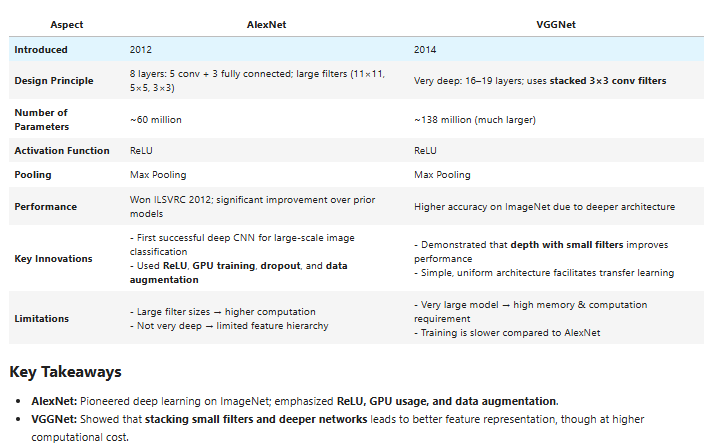

Question 4: What is transfer learning in the context of image classification? Explain how it helps in reducing computational costs and improving model performance with limited data.

Answer 4: Transfer Learning is a technique where a model pre-trained on a large dataset is adapted for a new, smaller dataset, reusing learned features from earlier layers.

- Reduces computational cost since only final layers are retrained.
- Improves performance with limited data by leveraging pre-learned representations.
- Enables faster convergence as the model starts with useful feature knowledge.

Question 5: Describe the role of residual connections in ResNet architecture. How do they address the vanishing gradient problem in deep CNNs?

Answer 5: Residual Connections in ResNet are shortcut links that skip one or more layers and add the input directly to the output of a block.

Role in ResNet:
- Allow the network to learn residual functions instead of full mappings.
- Help preserve information across layers.

Addressing Vanishing Gradient:
- Provide a direct path for gradients during backpropagation.
- Ensure stable gradient flow in very deep CNNs, preventing gradients from becoming too small.

Question 6: Implement the LeNet-5 architectures using Tensorflow or PyTorch to classify the MNIST dataset. Report the accuracy and training time.

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Subset
import time

# Define LeNet-5
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.AvgPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*4*4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(torch.tanh(self.conv1(x)))
        x = self.pool(torch.tanh(self.conv2(x)))
        x = x.view(-1, 16*4*4)
        x = torch.tanh(self.fc1(x))
        x = torch.tanh(self.fc2(x))
        x = self.fc3(x)
        return x

# Data preprocessing
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Take a subset (e.g., 20% of training data)
subset_size = int(0.2 * len(train_dataset))
train_subset = Subset(train_dataset, list(range(subset_size)))

train_loader = DataLoader(train_subset, batch_size=64, shuffle=True)
test_loader = DataLoader(datasets.MNIST(root='./data', train=False, download=True, transform=transform),
                         batch_size=1000, shuffle=False)

# Model, loss, optimizer
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = LeNet5().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training
epochs = 3
start_time = time.time()
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f'Epoch {epoch+1}, Loss: {running_loss/len(train_loader):.4f}')
end_time = time.time()

# Evaluation
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy: {accuracy:.2f}%, Training time: {end_time - start_time:.2f} seconds')

100%|██████████| 9.91M/9.91M [00:01<00:00, 5.02MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 131kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.25MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 4.56MB/s]


Epoch 1, Loss: 0.6935
Epoch 2, Loss: 0.2542
Epoch 3, Loss: 0.1681
Accuracy: 94.79%, Training time: 16.22 seconds


Question 7: Use a pre-trained VGG16 model (via transfer learning) on a small custom dataset (e.g., flowers or animals). Replace the top layers and fine-tune the model. Include your code and result discussion.

In [4]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

# Image parameters
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
NUM_CLASSES = 5

# Data generators
train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_data = train_gen.flow_from_directory(
    "flowers",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training"
)

val_data = train_gen.flow_from_directory(
    "flowers",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation"
)

# Load VGG16 without top layers
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(224,224,3))

# Freeze base model
for layer in base_model.layers:
    layer.trainable = False

# Custom top layers
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
output = Dense(NUM_CLASSES, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=output)

# Compile
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# Train
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)

# Fine-tuning: unfreeze last 4 VGG layers
for layer in base_model.layers[-4:]:
    layer.trainable = True

model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.fit(
    train_data,
    validation_data=val_data,
    epochs=5
)


Found 487 images belonging to 5 classes.
Found 119 images belonging to 5 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 360s 23s/step - accuracy: 0.2697 - loss: 1.7194 - val_accuracy: 0.5882 - val_loss: 1.1235
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 340s 21s/step - accuracy: 0.5495 - loss: 1.1640 - val_accuracy: 0.6807 - val_loss: 0.9984
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 352s 22s/step - accuracy: 0.6424 - loss: 0.9485 - val_accuracy: 0.7059 - val_loss: 0.8550
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 327s 21s/step - accuracy: 0.7578 - loss: 0.7483 - val_accuracy: 0.7059 - val_loss: 0.7887
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 376s 20s/step - accuracy: 0.7331 - loss: 0.7103 - val_accuracy: 0.7563 - val_loss: 0.7583
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 319s 20s/step - accuracy: 0.7446 - loss: 0.6500 - val_accuracy: 0.7143 - val_loss: 0.7766
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 319s 20s/step - accuracy: 0.8145 - loss: 0.5803 - val_accuracy: 0.7311 - val_loss: 0.7789
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 322s 20s/step - accuracy: 0.8064 - loss: 0.5313 - val_accuracy: 0.

KeyboardInterrupt: 

Question 8: Write a program to visualize the filters and feature maps of the first convolutional layer of AlexNet on an example input image.

In [5]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Load pre-trained AlexNet
model = models.alexnet(pretrained=True)
model.eval()

# Extract first convolution layer
conv1 = model.features[0]

# Load and preprocess image
img = Image.open("example.jpg").convert("RGB")

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

input_img = transform(img).unsqueeze(0)

# Forward pass through first conv layer
with torch.no_grad():
    feature_maps = conv1(input_img)

# ---- Visualize Filters ----
filters = conv1.weight.data

plt.figure(figsize=(10, 6))
for i in range(8):
    plt.subplot(2, 4, i+1)
    filt = filters[i]
    filt = (filt - filt.min()) / (filt.max() - filt.min())
    plt.imshow(filt.permute(1, 2, 0))
    plt.axis("off")
plt.suptitle("AlexNet Conv1 Filters")
plt.show()

# ---- Visualize Feature Maps ----
plt.figure(figsize=(10, 6))
for i in range(8):
    plt.subplot(2, 4, i+1)
    fmap = feature_maps[0, i].cpu()
    plt.imshow(fmap, cmap="gray")
    plt.axis("off")
plt.suptitle("AlexNet Conv1 Feature Maps")
plt.show()


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


100%|██████████| 233M/233M [00:01<00:00, 175MB/s]


FileNotFoundError: [Errno 2] No such file or directory: 'example.jpg'

Question 9: Train a GoogLeNet (Inception v1) or its variant using a standard dataset like CIFAR-10. Plot the training and validation accuracy over epochs and analyze overfitting or underfitting.


In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


from tensorflow.keras.layers import Conv2D, MaxPooling2D, Concatenate

def inception_module(x, f1, f3, f5, fp):
    p1 = Conv2D(f1, (1,1), activation="relu", padding="same")(x)

    p2 = Conv2D(f3, (1,1), activation="relu", padding="same")(x)
    p2 = Conv2D(f3, (3,3), activation="relu", padding="same")(p2)

    p3 = Conv2D(f5, (1,1), activation="relu", padding="same")(x)
    p3 = Conv2D(f5, (5,5), activation="relu", padding="same")(p3)

    p4 = MaxPooling2D((3,3), strides=(1,1), padding="same")(x)
    p4 = Conv2D(fp, (1,1), activation="relu", padding="same")(p4)

    return Concatenate()([p1, p2, p3, p4])


from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

inputs = Input(shape=(32,32,3))

x = Conv2D(64, (3,3), activation="relu", padding="same")(inputs)
x = MaxPooling2D((2,2))(x)

x = inception_module(x, 32, 64, 16, 16)
x = inception_module(x, 64, 96, 32, 32)

x = MaxPooling2D((2,2))(x)

x = inception_module(x, 96, 128, 32, 32)
x = GlobalAveragePooling2D()(x)

outputs = Dense(10, activation="softmax")(x)

model = Model(inputs, outputs)
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()


history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=20,
    batch_size=64
)


plt.figure(figsize=(8,5))
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("GoogLeNet on CIFAR-10")
plt.show()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 32, 32,    │      1,792 │ input_layer_1[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 16, 16,    │          0 │ conv2d[0][0]      │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 16, 16,    │      4,160 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 16, 16,    │      1,040 │ max_pooling2d[0]… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 16, 16,    │          0 │ max_pooling2d[0]… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 16, 16,    │      2,080 │ max_pooling2d[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 16, 16,    │     36,928 │ conv2d_2[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 16, 16,    │      6,416 │ conv2d_4[0][0]    │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 16, 16,    │      1,040 │ max_pooling2d_1[… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 16, 16,    │          0 │ conv2d_1[0][0],   │
│ (Concatenate)       │ 128)              │            │ conv2d_3[0][0],   │
│                     │                   │            │ conv2d_5[0][0],   │
│                     │                   │            │ conv2d_6[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 16, 16,    │     12,384 │ concatenate[0][0] │
│                     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_10 (Conv2D)  │ (None, 16, 16,    │      4,128 │ concatenate[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 16, 16,    │          0 │ concatenate[0][0] │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 16, 16,    │      8,256 │ concatenate[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 16, 16,    │     83,040 │ conv2d_8[0][0]    │
│                     │ 96)               │            │                 

 Total params: 431,930 (1.65 MB)

 Trainable params: 431,930 (1.65 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
 15/782 ━━━━━━━━━━━━━━━━━━━━ 10:55 854ms/step - accuracy: 0.1194 - loss: 2.3073

KeyboardInterrupt: 

Question 10: You are working in a healthcare AI startup. Your team is tasked with
developing a system that automatically classifies medical X-ray images into normal,
pneumonia, and COVID-19. Due to limited labeled data, what approach would you
suggest using among CNN architectures discussed (e.g., transfer learning with ResNet
or Inception variants)? Justify your approach and outline a deployment strategy for
production use.


Problem:-

Build an AI system to classify X-ray images into:
-Normal
-Pneumonia
-COVID-19

The dataset is limited, so an efficient CNN approach is required.

Suggested Approach: Use transfer learning with a pre-trained ResNet-50 (preferred) or Inception-V3, fine-tuned on the X-ray dataset.

Justification
- Training from scratch may cause overfitting
- Pre-trained models reuse ImageNet-learned features
- ResNet-50 offers:
- - Residual connections
- - Stable training
- - Strong performance in medical imaging
- Inception-V3 captures multi-scale features but is computationally heavier

ResNet-50 is preferred

Training Strategy

- Load pre-trained ResNet-50
- Replace top layer with 3-class softmax
- Freeze early layers, fine-tune top layers
- Use mild data augmentation
- Handle class imbalance using class weights

Deployment Strategy:

Validation
- Metrics: Accuracy, Precision, Recall
- Focus on high COVID-19 recall
- Use Grad-CAM for explainability

Production
- Convert model to TensorFlow Lite / ONNX
- Deploy via REST API (FastAPI / Flask)
- Cloud-based deployment (AWS/GCP/Azure)
- Human-in-the-loop for safety and compliance

Conclusion

Transfer learning with ResNet-50 is an effective and practical solution for medical X-ray classification with limited labeled data, ensuring accuracy, efficiency, and safe deployment.